## Gene Set Enrichment Analysis
We use this notebook to show that the small sample lymphocyte proteomics data is in fact representative of lymphocytes specifically.

In [5]:
import load_data
data = load_data.load_max_quant()

Here we use a function from load_data to get the names, both the gene name code and verbose headers. We then add these to the quantification data.

In [6]:
names = load_data.names_max_quant()
data['Names'] = names['Gene names']
data['Header'] = names['Fasta headers']

Now we can run Gene Set Enrichment Analysis (GSEA) on the proteins identified.

In [7]:
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt


In [11]:
genesets = [
    'WikiPathways_2019_Human',  #
    'BioPlanet_2019',   
    'ProteomicsDB_2020',    
    'CCLE_Proteomics_2020', #says Hematopoetic and Lymphoid Tissues
    'KEGG_2019_Human',
    'Tissue_Protein_Expression_from_Human_Proteome_Map',
    'Tissue_Protein_Expression_from_ProteomicsDB',
    'GO_Biological_Process_2018',
    'GO_Cellular_Component_2018',
    'GO_Molecular_Function_2018',
]


We use the ProteomicsDB_2020 genesets, which compare our samples to documented lineages. The following plots show that the lymphocytes we measured are highly similar to several lymphoblastoid cell lines. Bones share a similarity as well, due to XXX

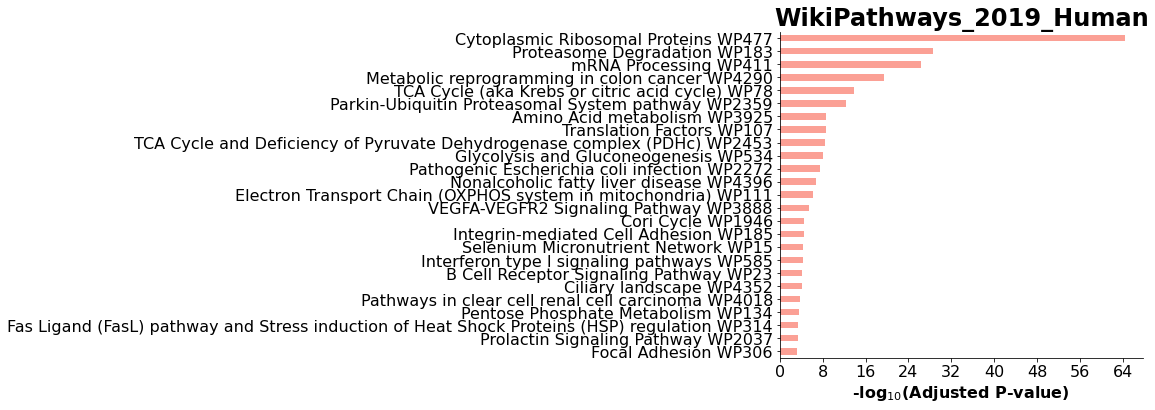

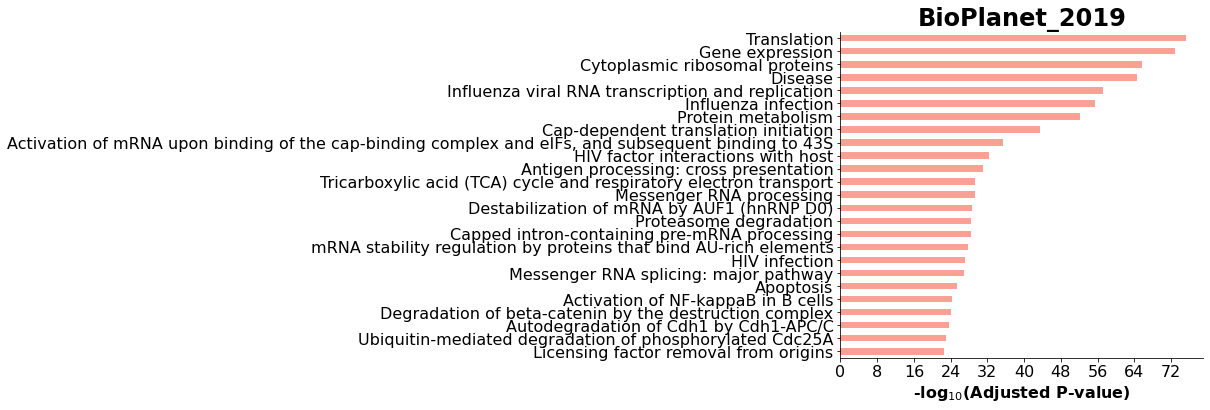

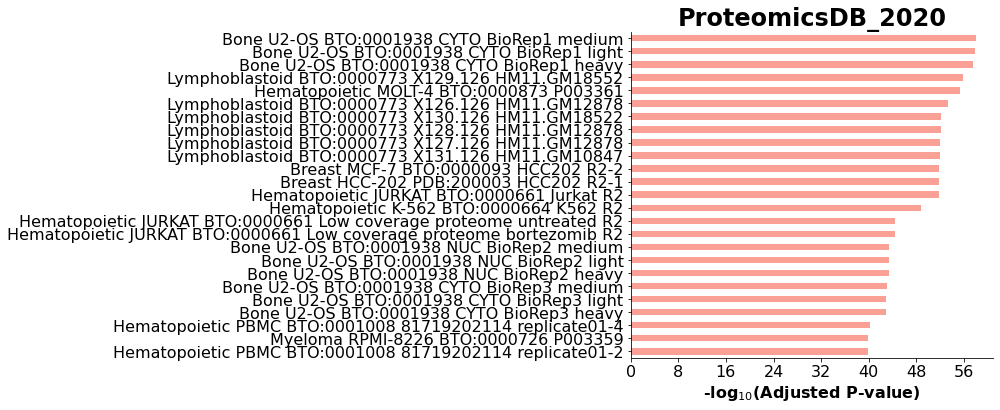

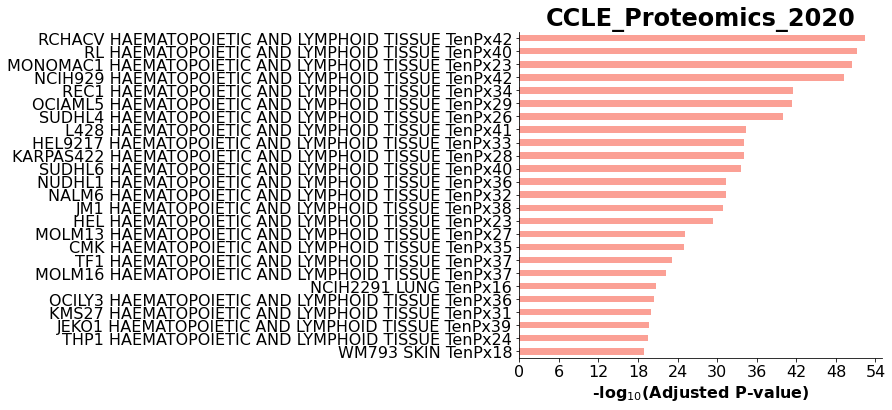

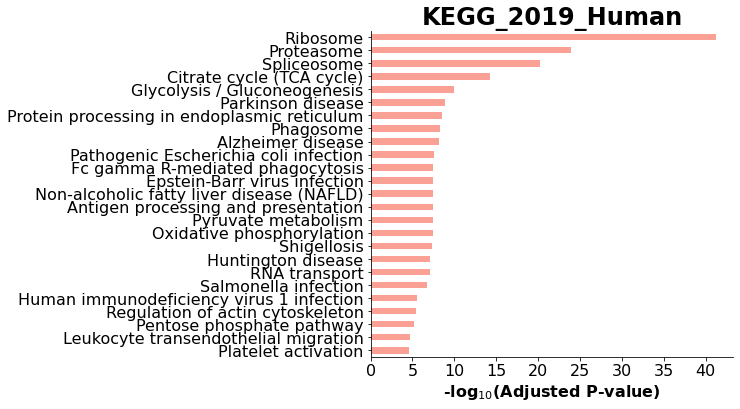

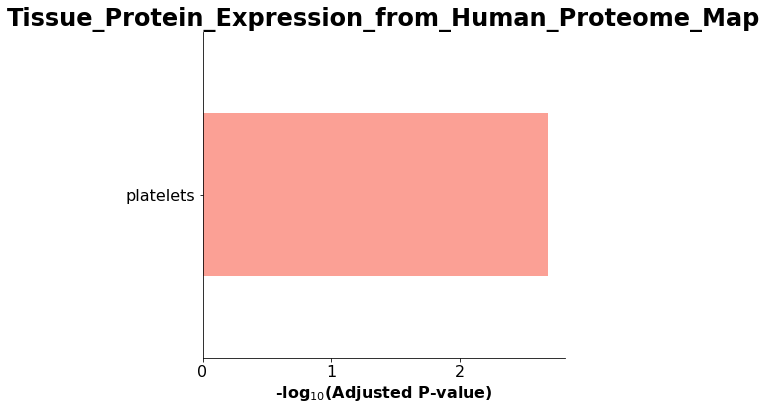

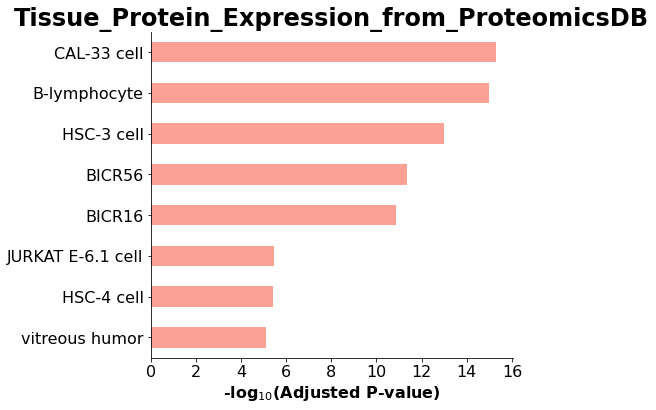

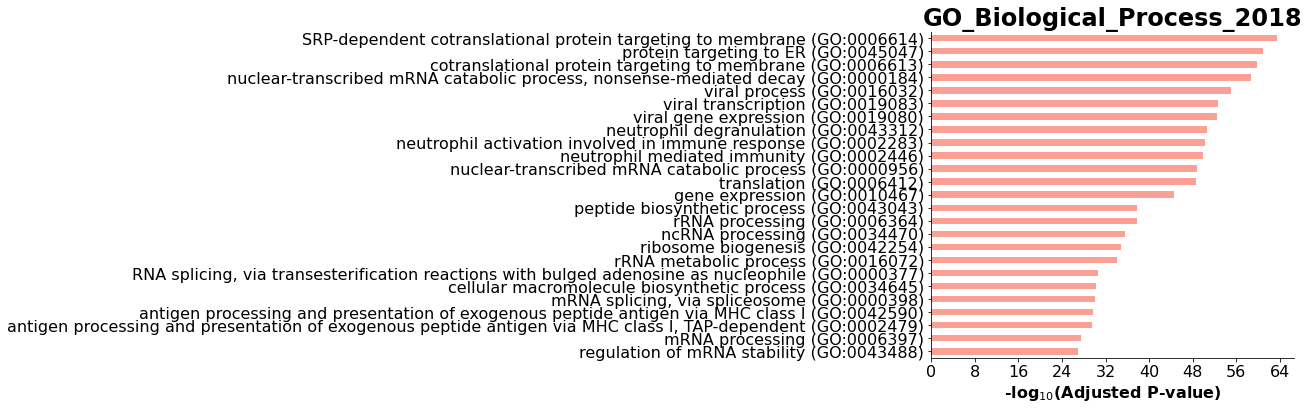

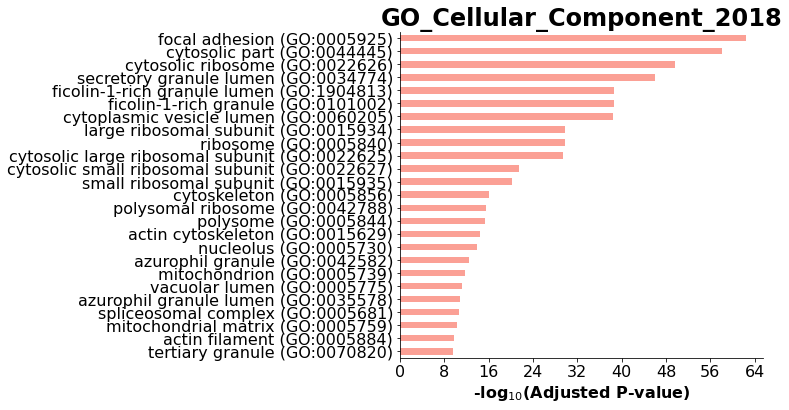

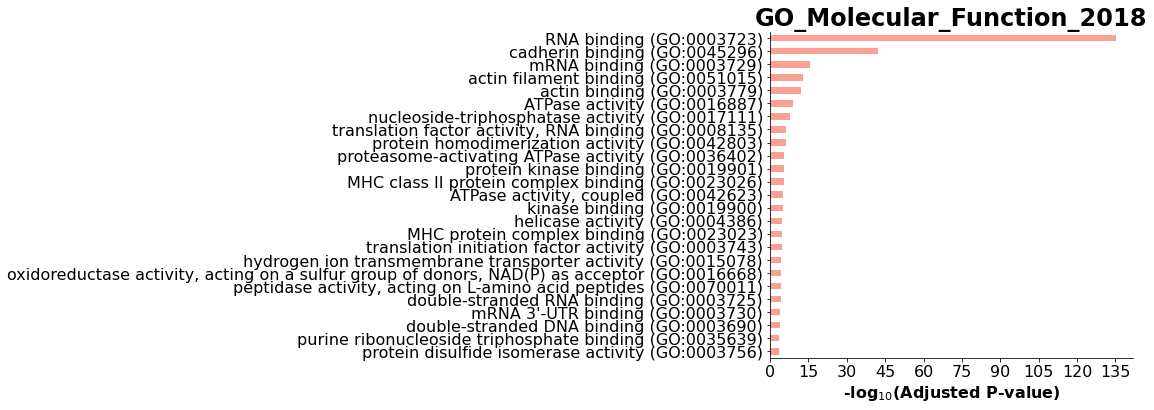

In [12]:
for gset in genesets:
    enr = gp.enrichr(gene_list=list(data.Names.dropna()), 
                   description="Lymphocytes",
                   gene_sets=gset,
                   outdir='/data/test/enrichr'
                )
    barplot(enr.res2d, title=gset, top_term=25)
    plt.show()
#plt.savefig('data/gsea_all.png')

In [ ]:
dotplot(enr.res2d)